<a href="https://colab.research.google.com/github/Nihal-18/ML/blob/master/EXP_9/Exp_9_(_2_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: NIHAL M TODANKAR

ROLL NO: J058

TOPIC: Acute Inflammations

NO.: 12

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [53]:
df= pd.read_csv('/content/drive/My Drive/Urinary_disease_csv.csv')

In [54]:
df.head()

,temperature,occurrence_of_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,nephritis_of_renal_pelvis_origin,inflammation_of_urinary_bladder
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,no,yes
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,no,yes
4,36.0,no,yes,no,no,no,no,no


In [55]:
y_norm= df['\xa0nephritis_of_renal_pelvis_origin']

In [56]:
y= pd.get_dummies(df['\xa0nephritis_of_renal_pelvis_origin'])

print('Y_shape= ',y.shape)

Y_shape=  (120, 2)


In [57]:
df= df.drop(columns= ['\xa0nephritis_of_renal_pelvis_origin'])

In [58]:
df.shape

(120, 7)

In [59]:
X= pd.get_dummies(df)

In [60]:
X.shape

(120, 13)

In [61]:
X

,temperature,occurrence_of_nausea_no,occurrence_of_nausea_yes,lumbar_pain_no,lumbar_pain_yes,urine_pushing_no,urine_pushing_yes,micturition_pains_no,micturition_pains_yes,burning_of_urethra_no,burning_of_urethra_yes,inflammation_of_urinary_bladder_no,inflammation_of_urinary_bladder_yes
0,35.5,1,0,0,1,1,0,1,0,1,0,1,0
1,35.9,1,0,1,0,0,1,0,1,0,1,0,1
2,35.9,1,0,0,1,1,0,1,0,1,0,1,0
3,36.0,1,0,1,0,0,1,0,1,0,1,0,1
4,36.0,1,0,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41.4,1,0,0,1,0,1,1,0,0,1,1,0
116,41.5,1,0,1,0,1,0,1,0,1,0,1,0
117,41.5,0,1,0,1,1,0,0,1,1,0,1,0
118,41.5,1,0,0,1,0,1,1,0,0,1,1,0


In [63]:
mn= X['temperature'].mean()

In [64]:
mn

38.72416666666666

In [65]:
sd= X['temperature'].std()

In [66]:
sd

1.819132484784679

In [67]:
X['temperature']= ( ( X['temperature']- mn) / sd)

In [68]:
X['temperature']

0     -1.772365
1     -1.552480
2     -1.552480
3     -1.497509
4     -1.497509
         ...   
115    1.470939
116    1.525910
117    1.525910
118    1.525910
119    1.525910
Name: temperature, Length: 120, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te= train_test_split(X, y_norm, test_size= 0.2, random_state= 9)

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 9)

In [71]:
print('X_train Shape= ',X_train.shape)
print('X_test Shape= ',X_test.shape)
print('Y_train Shape= ',y_train.shape)
print('Y_test Shape= ',y_test.shape)

X_train Shape=  (96, 13)
X_test Shape=  (24, 13)
Y_train Shape=  (96, 2)
Y_test Shape=  (24, 2)


In [72]:
print('X_tr Shape= ',X_tr.shape)
print('X_te Shape= ',X_te.shape)
print('Y_tr Shape= ',y_tr.shape)
print('Y_te Shape= ',y_te.shape)

X_tr Shape=  (96, 13)
X_te Shape=  (24, 13)
Y_tr Shape=  (96,)
Y_te Shape=  (24,)


In [74]:
from keras import models 
from keras import layers

In [75]:
nn= models.Sequential()

nn.add(layers.Dense(256, activation= 'tanh', input_dim= 13))
nn.add(layers.Dense(128, activation= 'relu'))
nn.add(layers.Dense(64, activation= 'relu'))
nn.add(layers.Dense(2, activation= 'sigmoid'))

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 44,866
Trainable params: 44,866
Non-trainable params: 0
_________________________________________________________________


In [76]:
nn.compile(optimizer= 'adam', loss= ['binary_crossentropy'], metrics= ['accuracy'])

In [77]:
hist= nn.fit(X_train, y_train, epochs= 10, validation_split= 0.2)

Epoch 1/10
3/3 [==============================] - 0s 58ms/step - loss: 0.6621 - accuracy: 0.5000 - val_loss: 0.5805 - val_accuracy: 0.9500
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: 0.5491 - accuracy: 1.0000 - val_loss: 0.4940 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 0.4536 - accuracy: 1.0000 - val_loss: 0.4077 - val_accuracy: 0.9500
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 0.3567 - accuracy: 1.0000 - val_loss: 0.3246 - val_accuracy: 0.9500
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 0.2692 - accuracy: 1.0000 - val_loss: 0.2444 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 0.1903 - accuracy: 1.0000 - val_loss: 0.1690 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 6ms/step - loss: 0.1246 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=================

In [79]:
nn.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 1.0000


[0.01427439320832491, 1.0]

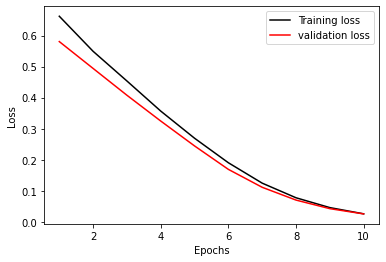

In [78]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,11)

plt.plot(epochs, loss_train, 'k', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

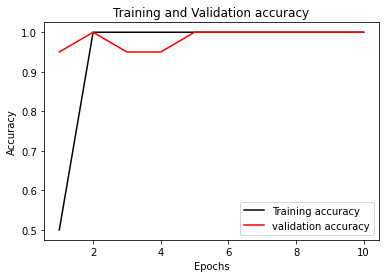

In [80]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']

epochs = range(1,11)

plt.plot(epochs, loss_train, 'k', label='Training accuracy')
plt.plot(epochs, loss_val, 'r', label='validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
# Going for KNN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

In [83]:
knn.fit(X_train,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [84]:
y_pred_knn=knn.predict(X_test)
print("accuracy KNN= ",accuracy_score(y_te,y_pred_knn))

accuracy KNN=  1.0


In [ ]:
# Going for SVM


In [85]:
from sklearn.svm import SVC

In [86]:
SVCClf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)

SVCClf.fit(X_train, y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=False,
    tol=0.001, verbose=False)

In [87]:
y_preds= SVCClf.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy : ', accuracy_score(y_te, y_preds))

Accuracy :  1.0
